<a href="https://colab.research.google.com/github/satuelisa/ICN2024/blob/main/S3_structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 3
## Structural characterization of vertices, edges, and graphs

Vertices: PageRank

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
from networkx.generators.random_graphs import powerlaw_cluster_graph

In [6]:
G = powerlaw_cluster_graph(30, 3, 0.05)
coords = nx.spectral_layout(G)
rank = nx.pagerank(G) # default damping
print(list(rank.items())[:5])

[(0, 0.056943438843560665), (1, 0.07534372263424781), (2, 0.015595580326032641), (3, 0.10243853186311061), (4, 0.04159619198334576)]


In [7]:
from math import log

# normalize to [0, 1] and logscale
low = min(rank.values())
high = max(rank.values())
span = high - low
if low < high:
  rank = [ log((rank[v] - low) / span + 1) for v in G.nodes() ]

In [8]:
opt = { 'node_size': 200,
        'width': 3,
        'with_labels': True,
        'font_color': 'black',
        'edge_color': 'orange' }

(-1.1299351075712971,
 0.3674123225360325,
 -0.6411096707297296,
 0.4325174914545233)

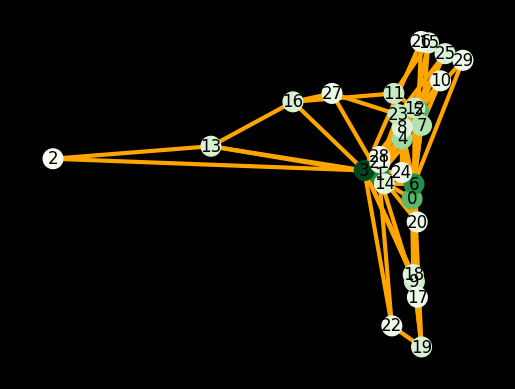

In [9]:
fig, ax = plt.subplots()
nx.draw(G,
        pos = coords,
        cmap = plt.get_cmap('Greens'), # https://matplotlib.org/stable/tutorials/colors/colormaps.html
        node_color = [ rank[v] for v in G.nodes() ], **opt)
ax.set_facecolor('black')
fig.set_facecolor('black')
ax.axis('off')

Edges: Betweenness

In [10]:
from networkx.algorithms.centrality import edge_betweenness_centrality
centrality = edge_betweenness_centrality(G)
print(list(centrality.items())[:3])

[((0, 3), 0.030311986863711), ((0, 4), 0.014567597153804051), ((0, 5), 0.020454296661193215)]


In [11]:
# normalize to [0, 1]
low = min(centrality.values())
high = max(centrality.values())
span = high - low
if low < high:
  weight = [(centrality[e] - low) / span for e in G.edges()]
else:
  weight = centrality

(-1.1299351075712971,
 0.3674123225360325,
 -0.6411096707297296,
 0.4325174914545233)

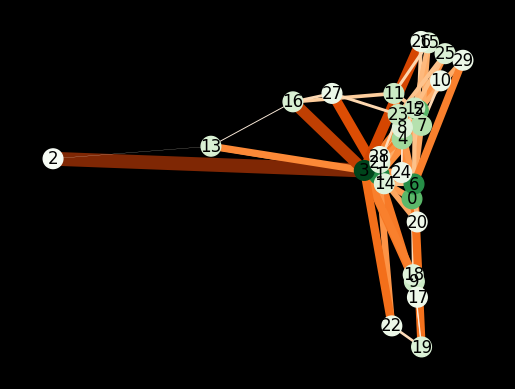

In [12]:
if 'width' in opt:
  del opt['width'] # discard if present
width = 10 # set a maximum
if 'edge_color' in opt:
  del opt['edge_color']
fig, ax = plt.subplots()
nx.draw(G,
        pos = coords,
        cmap = plt.get_cmap('Greens'),
        edge_cmap = plt.get_cmap('Oranges'),
        node_color = rank,
        edge_color = weight,
        width = [width * w for w in weight] ,
        **opt)
ax.set_facecolor('black')
fig.set_facecolor('black')
ax.axis('off')